In [76]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit

In [77]:
df=pd.read_csv('/home/somit/Desktop/Codes/Sample_Data_LHR_Airport/Sample_Data_LHR_Airport/sample_data_feb_2018.csv')
print df.shape
df.head()
df.info()

(48432, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48432 entries, 0 to 48431
Data columns (total 10 columns):
departure_date              48432 non-null object
airline_code                48432 non-null object
flight_number               48432 non-null int64
source_airport              48432 non-null object
destination_airport         48432 non-null object
flight_status               48432 non-null object
departure_scheduled_time    48055 non-null float64
departure_actual_time       48432 non-null int64
arrival_scheduled_time      48198 non-null float64
arrival_actual_time         47779 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 3.7+ MB


In [78]:
df_info=pd.DataFrame(df.dtypes).T.rename(index={0:'Column Data Type'})
df_info=df_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'Null values'}))
df_info

,departure_date,airline_code,flight_number,source_airport,destination_airport,flight_status,departure_scheduled_time,departure_actual_time,arrival_scheduled_time,arrival_actual_time
Column Data Type,object,object,int64,object,object,object,float64,int64,float64,float64
Null values,0,0,0,0,0,0,377,0,234,653


In [79]:
print df['departure_scheduled_time'].isnull().sum()
print df['arrival_scheduled_time'].isnull().sum()
print df['arrival_actual_time'].isnull().sum()
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['fill factor ']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('fill factor ').reset_index(drop = True)
missing_df

377
234
653


,variable,missing values,fill factor
0,departure_date,0,100.000000
1,airline_code,0,100.000000
2,flight_number,0,100.000000
3,source_airport,0,100.000000
4,destination_airport,0,100.000000
5,flight_status,0,100.000000
6,departure_scheduled_time,377,99.221589
7,departure_actual_time,0,100.000000
8,arrival_scheduled_time,234,99.516848
9,arrival_actual_time,653,98.651718


In [80]:
a=df.isnull().any(axis=1).sum()
print a
a*1.0/df.shape[0]*100

1256


2.5933267261314832

In [81]:
print df['departure_scheduled_time'].min()
print df['departure_scheduled_time'].max()

1517464800.0
1519857300.0


In [82]:
features=['airline_code','source_airport','destination_airport','departure_scheduled_time','arrival_scheduled_time','flight_number']
temp=df[features]
temp

j=temp.loc[temp['airline_code']=='EK']
j=j.sort_values('arrival_scheduled_time')
j


,airline_code,source_airport,destination_airport,departure_scheduled_time,arrival_scheduled_time,flight_number
615,EK,LHR,DXB,1.517476e+09,1.517501e+09,8
0,EK,LHR,DXB,1.517486e+09,1.517512e+09,5010
734,EK,LHR,DXB,1.517486e+09,1.517512e+09,5110
79,EK,LHR,DXB,1.517492e+09,1.517518e+09,2
1182,EK,LHR,DXB,1.517502e+09,1.517526e+09,30
651,EK,LHR,DXB,1.517512e+09,1.517536e+09,32
1405,EK,LHR,KWI,1.517516e+09,1.517542e+09,4
309,EK,LHR,DXB,1.517518e+09,1.517542e+09,5102
610,EK,LHR,DXB,1.517522e+09,1.517547e+09,6
2165,EK,LHR,DXB,1.517563e+09,1.517587e+09,8


In [83]:
df=df.dropna(subset=['departure_scheduled_time','arrival_scheduled_time','arrival_actual_time'])
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47176 entries, 0 to 48431
Data columns (total 10 columns):
departure_date              47176 non-null object
airline_code                47176 non-null object
flight_number               47176 non-null int64
source_airport              47176 non-null object
destination_airport         47176 non-null object
flight_status               47176 non-null object
departure_scheduled_time    47176 non-null float64
departure_actual_time       47176 non-null int64
arrival_scheduled_time      47176 non-null float64
arrival_actual_time         47176 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [84]:
# import time
# import numpy as np
# i=0
# a=[]
# print df['departure_scheduled_time'].isnull().sum()
# df1=pd.DataFrame(df['departure_scheduled_time'])
# print df1.head()
# print df1.shape
# while i<df1.shape[0]:
#     r=time.ctime(df1.iloc[i]['departure_scheduled_time'])
#     a.append(r)
#     i+=1


In [85]:
# l=pd.DataFrame(a)
# df['TimeStamp']=l
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47176 entries, 0 to 48431
Data columns (total 10 columns):
departure_date              47176 non-null object
airline_code                47176 non-null object
flight_number               47176 non-null int64
source_airport              47176 non-null object
destination_airport         47176 non-null object
flight_status               47176 non-null object
departure_scheduled_time    47176 non-null float64
departure_actual_time       47176 non-null int64
arrival_scheduled_time      47176 non-null float64
arrival_actual_time         47176 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


In [86]:
i=0
print df.shape
a=[]
arrival_delay=[]
while i<df.shape[0]:
    t=df.iloc[i]['arrival_actual_time']-df.iloc[i]['arrival_scheduled_time']
    t=t*1.0/60
    arrival_delay.append(t)
    #print t
    if t>30:
        a.append(1)
    else:
        a.append(0)
    i+=1  

(47176, 10)


In [87]:
# a=(df['arrival_actual_time']-df['arrival_scheduled_time']*1.0)/60
# print a[:5]

In [88]:
df['Delayed']=a
df['Arrival_Delay']=arrival_delay
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47176 entries, 0 to 48431
Data columns (total 12 columns):
departure_date              47176 non-null object
airline_code                47176 non-null object
flight_number               47176 non-null int64
source_airport              47176 non-null object
destination_airport         47176 non-null object
flight_status               47176 non-null object
departure_scheduled_time    47176 non-null float64
departure_actual_time       47176 non-null int64
arrival_scheduled_time      47176 non-null float64
arrival_actual_time         47176 non-null float64
Delayed                     47176 non-null int64
Arrival_Delay               47176 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 4.7+ MB


In [89]:
df1=df.loc[df['airline_code']=='AH']
print df1.shape
df1['Arrival_Delay'].max()
df1['Arrival_Delay'].min()
df1['Arrival_Delay'].mean()
df1['Arrival_Delay'].count()


(16, 12)


16

In [90]:
def info(group):
    return {'min_arrival_delay':group.min(),'max_arrival_delay':group.max(),'mean_arrival_delay':group.mean()}

stats=df['Arrival_Delay'].groupby(df['airline_code']).apply(info).unstack()
stats=stats.sort_values('mean_arrival_delay')
stats

,max_arrival_delay,mean_arrival_delay,min_arrival_delay
airline_code,,,
AH,-51.0,-130.812500,-179.0
AT,49.0,-107.125000,-176.0
IR,-7.0,-31.000000,-58.0
EW,-3.0,-26.800000,-50.6
PR,33.0,-23.866667,-44.0
KU,5.0,-23.000000,-47.0
HM,132.0,-20.324675,-398.0
XY,132.0,-20.324675,-398.0
BI,14.0,-18.730769,-35.0


In [91]:
def times_delayed(group):
    return {'times_delayed_at_arrival':group.count()}

num_of_times_delayed=df['Delayed'].groupby(df['airline_code']).apply(times_delayed).unstack()
num_of_times_delayed=num_of_times_delayed.sort_values('times_delayed_at_arrival')
num_of_times_delayed

,times_delayed_at_arrival
airline_code,
BE,1
EW,2
IR,3
KU,3
J2,4
DT,8
VY,14
PR,15
AH,16


In [92]:
bigdata=stats.join(num_of_times_delayed)
bigdata=bigdata.sort_values('times_delayed_at_arrival')
bigdata=bigdata.reset_index()
bigdata

,airline_code,max_arrival_delay,mean_arrival_delay,min_arrival_delay,times_delayed_at_arrival
0,BE,-18.0,-18.000000,-18.0,1
1,EW,-3.0,-26.800000,-50.6,2
2,IR,-7.0,-31.000000,-58.0,3
3,KU,5.0,-23.000000,-47.0,3
4,J2,32.0,16.500000,-15.0,4
5,DT,43.0,-7.500000,-42.0,8
6,VY,105.0,2.357143,-26.0,14
7,PR,33.0,-23.866667,-44.0,15
8,AH,-51.0,-130.812500,-179.0,16
9,FB,20.0,-2.529412,-26.0,17


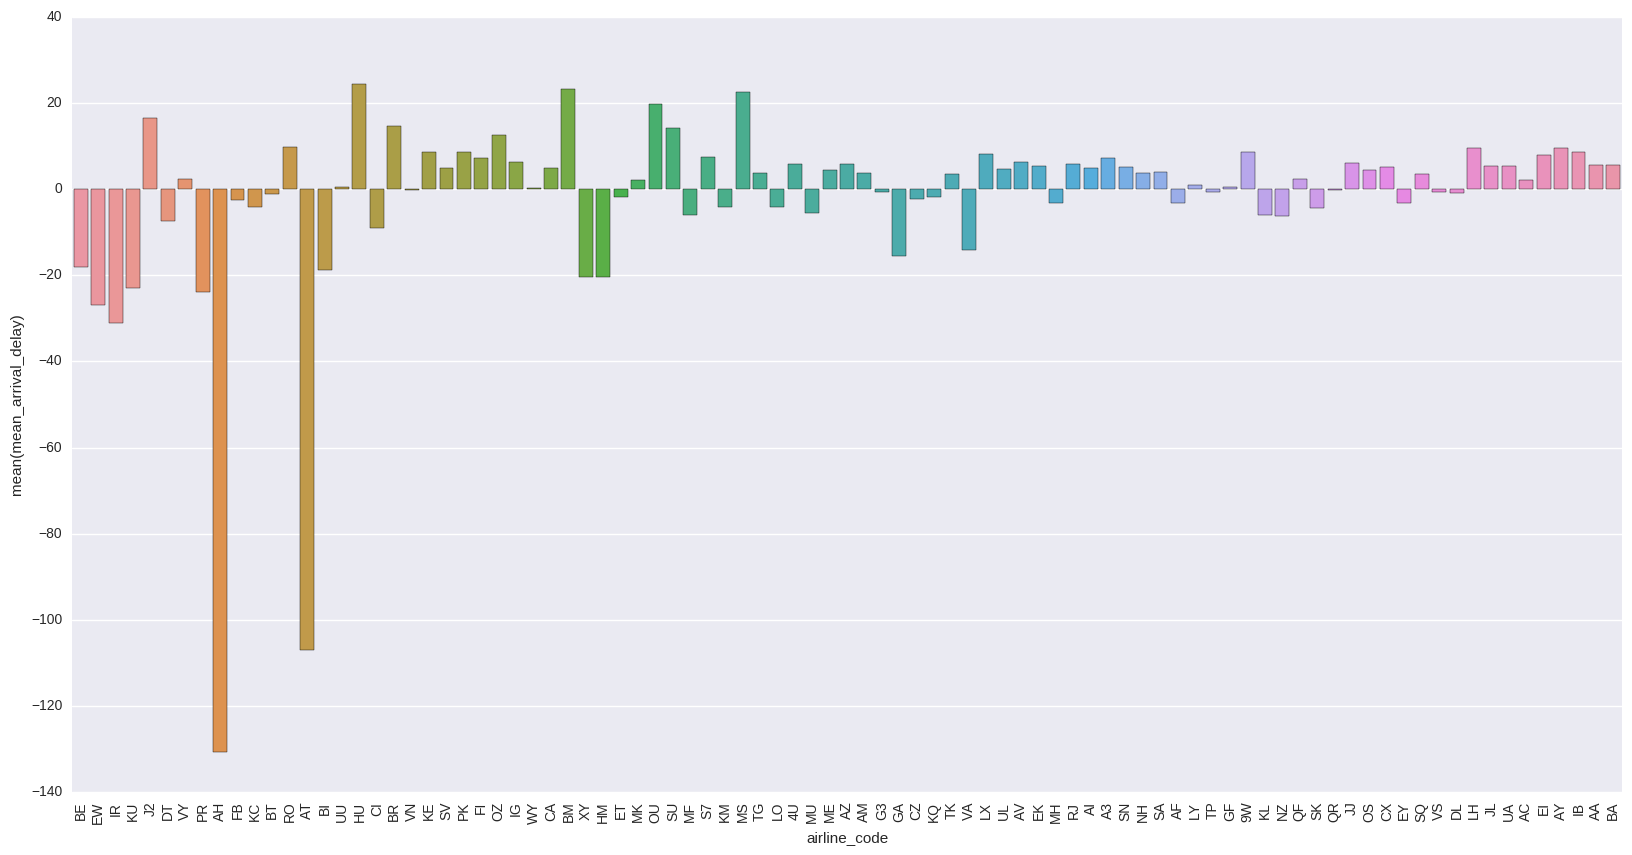

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
g=sns.barplot(x="airline_code",y="mean_arrival_delay",data=bigdata,ax=ax)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [94]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47176 entries, 0 to 48431
Data columns (total 12 columns):
departure_date              47176 non-null object
airline_code                47176 non-null object
flight_number               47176 non-null int64
source_airport              47176 non-null object
destination_airport         47176 non-null object
flight_status               47176 non-null object
departure_scheduled_time    47176 non-null float64
departure_actual_time       47176 non-null int64
arrival_scheduled_time      47176 non-null float64
arrival_actual_time         47176 non-null float64
Delayed                     47176 non-null int64
Arrival_Delay               47176 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 5.9+ MB


In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['airline_code']=le.fit_transform(df['airline_code'])
df['source_airport']=le.fit_transform(df['source_airport'])
df['destination_airport']=le.fit_transform(df['destination_airport'])
df['flight_status']=le.fit_transform(df['flight_status'])
df['flight_status']=1-df['flight_status']
df.head()

,departure_date,airline_code,flight_number,source_airport,destination_airport,flight_status,departure_scheduled_time,departure_actual_time,arrival_scheduled_time,arrival_actual_time,Delayed,Arrival_Delay
0,2018-02-01,26,5010,0,49,1,1.517486e+09,1517486460,1.517512e+09,1.517511e+09,0,-17.0
1,2018-02-01,37,4649,0,29,1,1.517498e+09,1517498940,1.517528e+09,1.517530e+09,1,32.0
2,2018-02-01,60,4292,0,12,1,1.517476e+09,1517475840,1.517502e+09,1.517500e+09,0,-37.0
3,2018-02-01,44,503,0,32,1,1.517516e+09,1517516820,1.517521e+09,1.517521e+09,0,4.0
4,2018-02-01,41,2861,0,61,1,1.517505e+09,1517504460,1.517511e+09,1.517510e+09,0,-13.0


In [96]:
s=StandardScaler()

df['departure_scheduled_time']=s.fit_transform(df['departure_scheduled_time'])
df['departure_actual_time']=s.fit_transform(df['departure_actual_time'])
df['arrival_scheduled_time']=s.fit_transform(df['arrival_scheduled_time'])
df['arrival_actual_time']=s.fit_transform(df['arrival_actual_time'])
df.head()

/home/somit/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/somit/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/somit/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has 

,departure_date,airline_code,flight_number,source_airport,destination_airport,flight_status,departure_scheduled_time,departure_actual_time,arrival_scheduled_time,arrival_actual_time,Delayed,Arrival_Delay
0,2018-02-01,26,5010,0,49,1,-1.706779,-1.706240,-1.695853,-1.697165,0,-17.0
1,2018-02-01,37,4649,0,29,1,-1.689406,-1.688181,-1.672842,-1.669907,1,32.0
2,2018-02-01,60,4292,0,12,1,-1.721980,-1.721607,-1.709747,-1.712790,0,-37.0
3,2018-02-01,44,503,0,32,1,-1.663781,-1.662308,-1.682828,-1.682321,0,4.0
4,2018-02-01,41,2861,0,61,1,-1.679851,-1.680193,-1.697156,-1.698120,0,-13.0


In [97]:
features=['airline_code','destination_airport','departure_scheduled_time','arrival_scheduled_time','source_airport']
df_train=df[features]
df_label=df['Delayed']
print len(df.loc[df['Delayed']==1])*1.0/47176*100
print len(df.loc[df['Delayed']==0])*1.0/47176*100
df_train.info()

12.0188231304
87.9811768696
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47176 entries, 0 to 48431
Data columns (total 5 columns):
airline_code                47176 non-null int64
destination_airport         47176 non-null int64
departure_scheduled_time    47176 non-null float64
arrival_scheduled_time      47176 non-null float64
source_airport              47176 non-null int64
dtypes: float64(2), int64(3)
memory usage: 3.4 MB


In [98]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# X_train,X_test=train_test_split(df_train,test_size=0.3)
# Y_train,Y_test=train_test_split(df_label,test_size=0.3)
# clf=XGBClassifier()
# clf.fit(X_train,Y_train)
# predictions=clf.predict(X_test)
# print accuracy_score(Y_test,predictions)

In [99]:
X_train=df_train
Y_train=df_label
X_train=X_train.values
Y_train=Y_train.values
print X_train.shape
print Y_train.shape
print Y_train[:5]
print X_train[:5]

(47176, 5)
(47176,)
[0 1 0 0 0]
[[ 26.          49.          -1.70677873  -1.69585324   0.        ]
 [ 37.          29.          -1.68940591  -1.67284162   0.        ]
 [ 60.          12.          -1.72197994  -1.70974706   0.        ]
 [ 44.          32.          -1.66378101  -1.6828278    0.        ]
 [ 41.          61.          -1.67985086  -1.69715579   0.        ]]


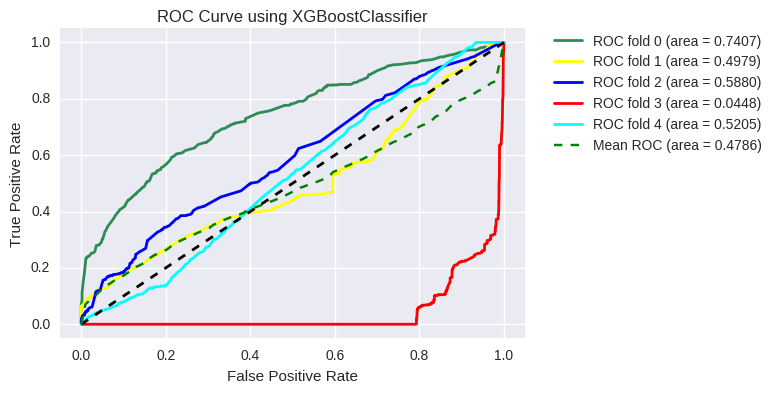

In [100]:
# kf=KFold(n_splits=2,shuffle=False,random_state=23)
from sklearn import cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc


clf=XGBClassifier()
skf = StratifiedKFold(n_splits=5,shuffle=False)
skf.get_n_splits(X_train,Y_train)
# clf=RandomForestClassifier()
# clf=DecisionTreeClassifier()
# clf=KNeighborsClassifier(n_neighbors = 25)
# clf=GaussianNB()
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
colors = ['seagreen', 'yellow','blue','red','cyan']
lw = 2
i = 0

for (train, test), color in zip(skf.split(X_train,Y_train), colors):
    probas_ = clf.fit(X_train[train],Y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(Y_train[test], probas_[:,1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')
mean_tpr /= skf.get_n_splits(X_train,Y_train)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',label='Mean ROC (area = %0.4f)'%mean_auc)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using XGBoostClassifier')
# plt.legend(loc="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

['airline_code', 'destination_airport', 'departure_scheduled_time', 'arrival_scheduled_time', 'source_airport']


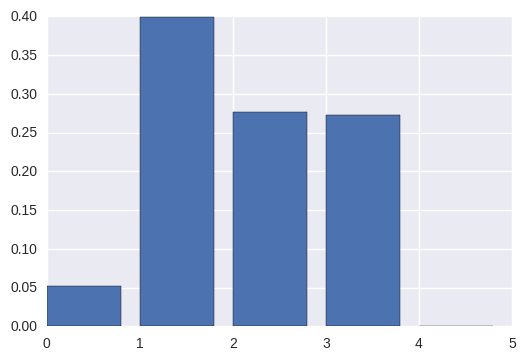

In [101]:
print features
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()